In [1]:
# This notebook is used to test the Draculab's topology class 
# By Sergio Verduzco Flores                August 2017

from sirasi import *
from matplotlib import pyplot as plt
import pylab
import time
import re

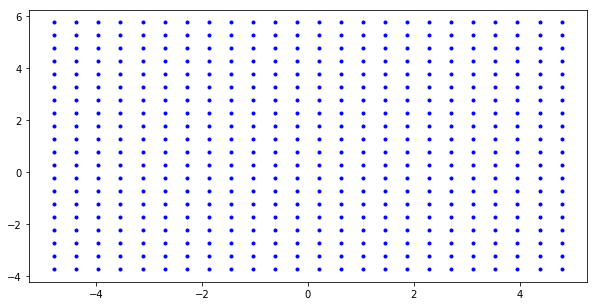

In [2]:
""" This cell is meant to test the create_group method with the 'sheet' shape and 'grid' arrangement """
topo = topology()

# Create network
net_params = {'min_delay' : 0.2, 'min_buff_size' : 4 } # parameter dictionary for the network
net = network(net_params)

# Create group of units
unit_pars = { 'init_val' : 0.5, 'function' : lambda x:None, 'type' : unit_types.source } 
geom = { 'shape':'sheet', 'extent':[10.,10.], 'center':[0.,1.], 'arrangement':'grid', 
         'rows':20, 'columns':24 }
ids = topo.create_group(net, geom, unit_pars)
xvals = [ u.coordinates[0] for u in net.units ]
yvals = [ u.coordinates[1] for u in net.units ]

figg = plt.figure(figsize=(10,5))
pylab.plot(xvals, yvals, 'b.')
plt.show()

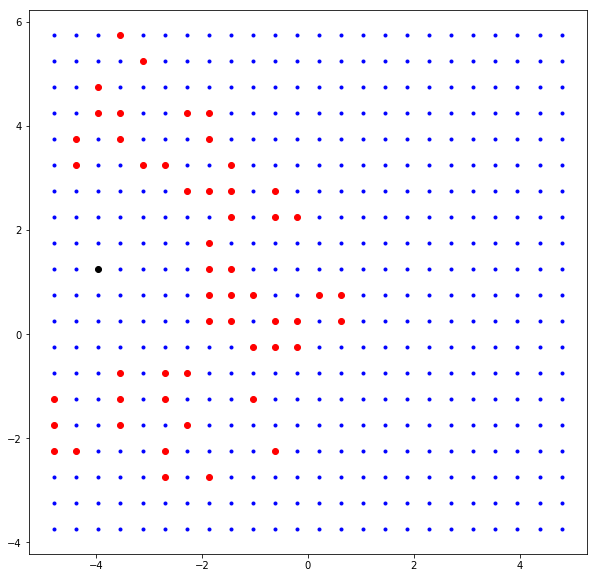

In [3]:
""" This cell tessts the topo_connect method continuing with the network in the previous cell. """

# create the spec dictionaries
conn_spec = {'connection_type' : 'divergent',
             'mask' : {"annular" : {"inner_radius": 2., 'outer_radius':5.}},
             'kernel' : {'gaussian':{'p_center':1., 'sigma':3.}},
             'delays' : {'linear' : {'c':0.1, 'a':0.1}},
             'weights' : {'linear' : {'c':5., 'a':1.}}
            }
syn_spec = {'type' : synapse_types.static, 'init_w' : 0.3 }

# connect
topo.topo_connect(net, ids, ids, conn_spec, syn_spec)

# visualizing the connections of a given unit
u = ids[50]
all_syns = []
for syn_list in net.syns:
    all_syns += syn_list
targets = [syn.postID for syn in all_syns if syn.preID == u]
coords = [ unit.coordinates for unit in [net.units[idx] for idx in targets] ]
xcoords = [c[0] for c in coords]
ycoords = [c[1] for c in coords]

fig2 = plt.figure(figsize=(10,10))
pylab.plot(xvals, yvals, 'b.')
pylab.plot(xcoords, ycoords, 'ro', net.units[u].coordinates[0], net.units[u].coordinates[1], 'ko')
plt.show()
